Ex 4.8 - Whitening vs Standardizing
-----------------------------------

In [1]:
%matplotlib inline
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.linalg as spl

In [2]:
def plot_data(ax, arr, cov_matrix, xlims, ylims):
    plot_color = 'DodgerBlue'
    alpha_val = 0.7
    l, v = np.linalg.eig(cov_matrix)
    ax.scatter(arr[:,0], arr[:,1], linewidths= 0, alpha = alpha_val, c = plot_color)
    ell = Ellipse(xy = np.average(arr, axis = 0), width = 4*np.sqrt(l[0]), 
                  height = 4*np.sqrt(l[1]), angle = np.rad2deg(np.arccos(v[0,0])), alpha = alpha_val)
    ell.set_facecolor('none')
    ax.add_artist(ell)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [3]:
#raw_data
data = np.loadtxt('../data/height_weight_data.txt', delimiter=',', dtype = int)
data_male = data[data[:,0] == 1]
data_male = data_male[:,1:]

mu_male = np.average(data_male, axis = 0)
sigma_male = np.cov(data_male.T, bias = 1)

In [4]:
#standarized_data

data_male_std = (data_male - mu_male) / np.sqrt(np.diag(sigma_male))
l_std, v_std = np.linalg.eig(np.cov(data_male_std.T, bias = 1))

In [5]:
print('Checking that we have zero mean and unitary std:')
print('Average vector:')
print(np.average(data_male_std, axis = 0))
print('Standard deviation:')
print(np.std(data_male_std, axis = 0))
print('But... Covariance matrix:')
print(np.cov(data_male_std.T))
print('Data not uncorrelated!')

Checking that we have zero mean and unitary std:
Average vector:
[  1.47218615e-15  -3.42192028e-16]
Standard deviation:
[ 1.  1.]
But... Covariance matrix:
[[ 1.01388889  0.47612226]
 [ 0.47612226  1.01388889]]
Data not uncorrelated!


In [6]:
#whitening
data_male_zero_mean = data_male - mu_male #zero mean by design (MISSING FROM EXERCISE)
eig_vals, eig_vecs = np.linalg.eig(np.cov(data_male_zero_mean.T)) 
eig_vecs[:,1] *=-1 #to match figure, shouldn't matter I hope (eig_vecs are still eig_vecs after linear transf)
data_white = np.diag(1./np.sqrt(eig_vals)).dot(eig_vecs.T.dot(data_male_zero_mean.T))

In [7]:
print('Confirming that we have changed the covariance matrix to identity:')
print(np.cov(data_white))

Confirming that we have changed the covariance matrix to identity:
[[  1.00000000e+00   5.55111512e-17]
 [  5.55111512e-17   1.00000000e+00]]


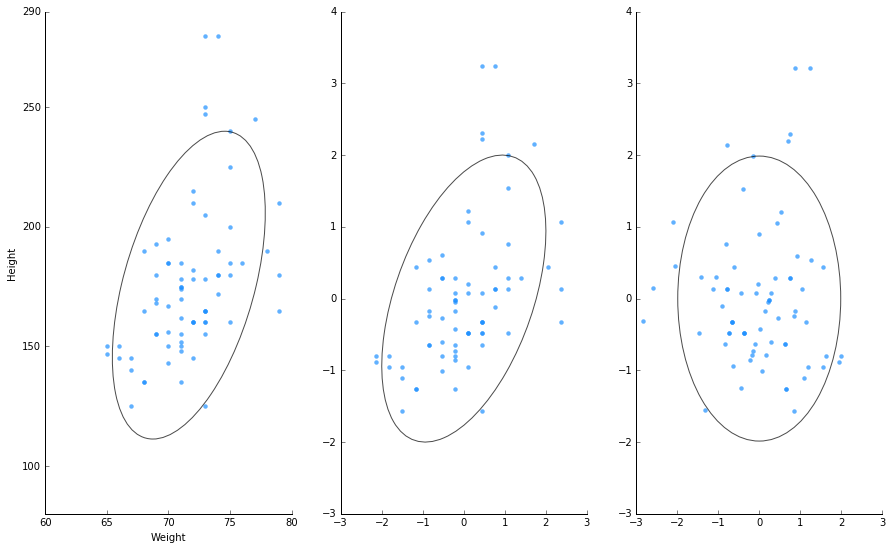

In [8]:
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(131)
plot_data(ax, data_male, sigma_male, (60,80), (80,290))
ax.set_xlabel('Weight')   
ax.set_ylabel('Height')   
ax.set_yticks([100, 150, 200, 250, 290])
ax2 = fig.add_subplot(132)
plot_data(ax2, data_male_std, np.cov(data_male_std.T, bias = 1),
         (-3,3), (-3,4))
ax3 = fig.add_subplot(133)
plot_data(ax3, data_white.T, np.cov(data_white, bias = 1),
         (-3,3), (-3,4))